In [1]:
!pip install python-telegram-bot


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import telegram
API_KEY = '5569257444:AAGV21Ds4fkrxhXkrevkdvQ289vGVcajYTU'
bot = telegram.Bot(token=API_KEY)

In [2]:
updates = bot.get_updates()
updates

[]

In [3]:
for i in updates:
    print(i.message['chat']['id'])

In [4]:
bot.sendMessage(chat_id='1760120639', text='구른다')

In [5]:
# 필요한 라이브러리 설치 및 불러오기
!pip install -U finance-datareader
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import datetime
import sys
import os
fdr.__version__


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


'0.9.34'

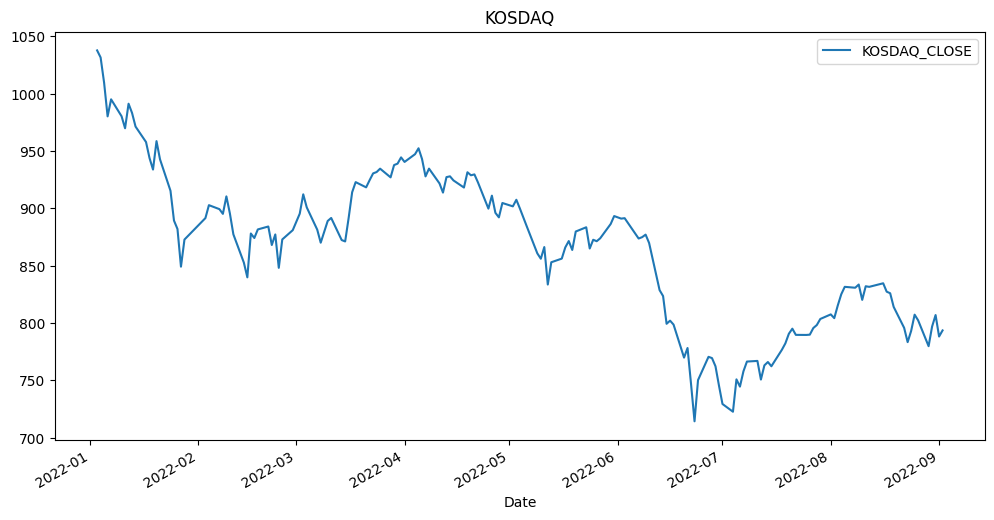

In [6]:
plt.style.use(['default']) # 다크모드에서 보기
plt.title('KOSDAQ')
df = fdr.DataReader('KQ11', '2022')
df['Close'].plot(figsize=(12,6), label='KOSDAQ_CLOSE')
plt.legend()
plt.show()


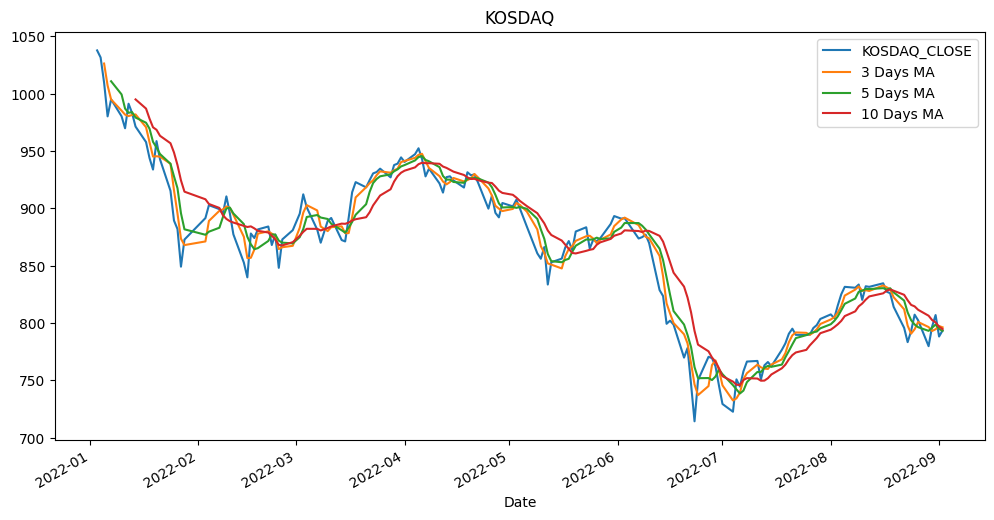

In [7]:
# 3,5,10 단순이동평균
plt.title('KOSDAQ')
df['Close'].plot(figsize=(12,6), label='KOSDAQ_CLOSE')
df['Close'].rolling(3).mean().plot(label = '3 Days MA')
df['Close'].rolling(5).mean().plot(label = '5 Days MA')
df['Close'].rolling(10).mean().plot(label = '10 Days MA')
plt.legend()
plt.show()

In [8]:
code = 'KQ11'
df = fdr.DataReader('KQ11','2022-08').reset_index()
# 3,5,10 이동평균 딕셔너리에 할당
df['close_sma3d'] = df['Close'].rolling(3).mean()
df['close_sma5d'] = df['Close'].rolling(5).mean()
df['close_sma10d'] = df['Close'].rolling(10).mean()


In [9]:
df.iloc[-10:]

,Date,Close,Open,High,Low,Volume,Change,close_sma3d,close_sma5d,close_sma10d
14,2022-08-22,795.87,806.90,806.92,795.87,811880000.0,-0.0225,812.033333,819.652,824.682
15,2022-08-23,783.42,789.95,793.81,781.92,855720000.0,-0.0156,797.820000,809.388,819.938
16,2022-08-24,793.14,788.36,793.14,782.97,714900000.0,0.0124,790.810000,802.532,815.887
17,2022-08-25,807.37,795.18,807.37,794.16,630310000.0,0.0179,794.643333,798.794,814.597
18,2022-08-26,802.45,810.33,813.00,801.84,718360000.0,-0.0061,800.986667,796.450,811.627
19,2022-08-29,779.89,780.48,783.45,775.33,619620000.0,-0.0281,796.570000,793.254,806.453
20,2022-08-30,797.02,783.99,797.03,783.99,667240000.0,0.0220,793.120000,795.974,802.681
21,2022-08-31,807.04,792.33,807.19,791.01,624080.0,0.0126,794.650000,798.754,800.643
22,2022-09-01,788.32,800.74,801.02,788.13,699180.0,-0.0232,797.460000,794.944,796.869
23,2022-09-02,793.64,793.11,795.87,790.78,348260.0,0.0067,796.333333,793.182,794.816


In [36]:
# dataframe 재구성
df2 = df.loc[: ,['Date','Close', 'close_sma3d','close_sma5d','close_sma10d']].iloc[-1:]
df2.dtypes

Date            datetime64[ns]
Close                  float64
close_sma3d            float64
close_sma5d            float64
close_sma10d           float64
dtype: object

In [41]:
import json
# print('\n--- Close for 2022-08-01 ---\n')

# print(df.loc[ df['Date'] == '2022-08-01', 'Close'])

# print('\n--- Previous Close < Close ---\n')

# df['Previous Close'] = df['Close'].shift(1)
# # df['Previous Date']  = df['Date'].shift(1)

# lower_close = df[ df['Previous Close'] < df['Close'] ]
# print(lower_close[['Previous Close', 'Close', 'Date']])

# print('\n--- alert_three,five,ten_days ---\n')

# 3, 5, 10 마켓타이밍 유무 딕셔너리에 할당
alerts = df2[(df2['Close'] > df2['close_sma3d']) | (df2['Close'] > df2['close_sma5d']) | (df2['Close'] > df2['close_sma10d'])]

# def display(row):
#     row = row.to_json(orient='records')
#     print(f" - {row['Date']} Signal 발생! now_price list {row['Close']} 3일이동평균 {row['close_sma3d']}")
# Market_timing = alerts.apply(display, axis=1)

# bot.sendMessage(chat_id = '1760120639', text = Market_timing)

# 3, 5, 10 마켓타이밍시 코스닥 현재가와 이동평균가 출력
for index, row in alerts.iterrows():
    z = row['Close']
    a = round(row['close_sma3d'], 2)
    b = round(row['close_sma5d'], 2)
    c = round(row['close_sma10d'], 2)
    # telegram 알람에서 출력하기 위해 json으로 변환
    jsonstr1 = json.dumps(str(row['Date']))
    Market_timing = (f"{jsonstr1} Signal 발생! 코스닥_현재가 {jsonstr2} 3일이동평균 {a} 5일이동평균 {b} 10일이동평균 {c}")
#     print(f" - {row['Date']} Signal 발생! 코스닥_현재가 {row['Close']} 3일이동평균 {row['close_sma3d']:.2f} 5일이동평균 {row['close_sma5d']:.2f} 10일이동평균 {row['close_sma10d']:.2f}")

bot.sendMessage(chat_id = '1760120639', text = Market_timing)


In [ ]:
!pip install schedule
!pip install bs4
!pip install datetime
!pip install pytz

In [ ]:
# # 알람 보내기

# import sys
# import io
# from bs4 import BeautifulSoup
# import requests
# import schedule
# import time
# import telegram
# import pytz
# import datetime

# count = 1

# def job():
#     global count
#     count += 1
#     now = datetime.datetime.now(pytz.timezone('Asia/Seoul'))
# #     today = date.weekday() and 
#     if now.hour > 15 or now.hour < 9 :
#         return
    
#     token = 'your token'
#     bot = telegram.Bot(token = token)
#     chat_id = "1760120639"
    
# #     with alerts.apply(display, axis=1) as s:
